In [54]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("..")  # Move up one level to the project root

In [50]:
import pandas as pd
import plotly.express as px
from src.time_series.preprocessing import PrePro
from src.time_series.validation import Plot
from src.time_series.analysis import Analysis

In [4]:
print(os.getcwd())

/Users/omare/Desktop/personal_project/time-series


In [5]:
#"/Users/omare/Desktop/personal_project/time-series/data/DailyDelhiClimateTrain.csv"

file_path_train = "./data/DailyDelhiClimateTrain.csv"

In [6]:
train_data = pd.read_csv(file_path_train)

In [55]:
prepro = PrePro()
plot = Plot()
analysis = Analysis()

In [8]:
prepro.to_datetime(df=train_data, name_column="date")

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1462 non-null   object        
 1   meantemp       1462 non-null   float64       
 2   humidity       1462 non-null   float64       
 3   wind_speed     1462 non-null   float64       
 4   meanpressure   1462 non-null   float64       
 5   date_datetime  1462 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.7+ KB


In [20]:
plot.plot_time_series(df=train_data, x="date", y="meantemp", title=f"time series temperature")

Approximate stationarity 

 
 Mean 1: 24.88719668898111, 
 Mean 2: 26.103844622542415 

 
 Variance 1: 56.3065336564004, 
 Variance 2: 51.01552894002579


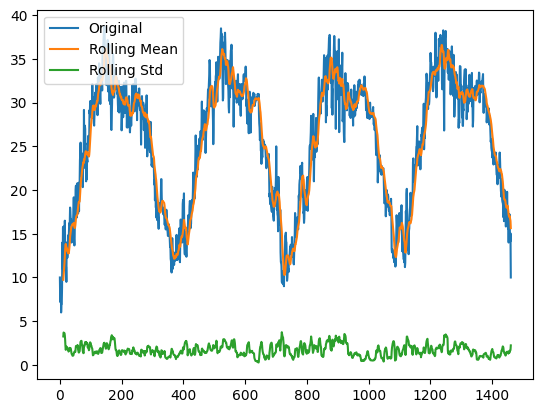

ADF Statistic: -2.021069055920669
p-value: 0.277412137230162
Fail to reject the null hypothesis. The time series is likely non-stationary.


In [56]:
analysis.check_stationarity(train_data, name="meantemp", window_size=12)

In [53]:
# from statsmodels.tsa.stattools import adfuller
# def adfuller_test(df:pd.DataFrame, value:str):
#     time_series_data = train_data[value]
#     result = adfuller(time_series_data)
#     print('ADF Statistic:', result[0])
#     print('p-value:', result[1])

#     if result[1] <= 0.05:
#         print("Reject the null hypothesis. The time series is likely stationary.")
#     else:
#         print("Fail to reject the null hypothesis. The time series is likely non-stationary.")

adfuller_test()

ADF Statistic: -2.021069055920669
p-value: 0.277412137230162
Fail to reject the null hypothesis. The time series is likely non-stationary.
